In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split


In [2]:
filename = 'Advertising.csv'
df_adv = pd.read_csv(filename)

In [3]:
df_adv.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
x_true = df_adv.TV.iloc[5:13]
y_true = df_adv.Sales.iloc[5:13]
idx = np.argsort(x_true).values
x_true = x_true.iloc[idx].values
y_true = y_true.iloc[idx].values

In [5]:
def find_nearest(array, value):
    idx = pd.Series(np.abs(array-value)).idxmin()
    return idx, array[idx]

In [6]:
x = np.linspace(np.min(x_true), np.max(x_true))
y = np.zeros((len(x)))


In [7]:
for i, xi in enumerate(x):
    y[i] = y_true[find_nearest(x_true,xi)[0]]

Text(0, 0.5, 'Sales in $1000')

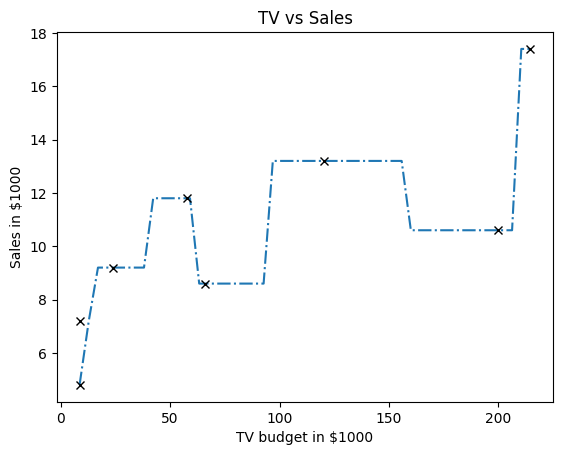

In [8]:
plt.plot(x,y, '-.')
plt.plot(x_true,y_true,'kx')
plt.title('TV vs Sales')
plt.xlabel('TV budget in $1000')
plt.ylabel('Sales in $1000')

In [9]:

data_filename = 'Advertising.csv'
df = pd.read_csv(data_filename)
x = df[['TV']]
y = df['Sales']

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.6, test_size=0.4,random_state=42)

In [11]:
k_value_min = 1
k_value_max = 70
k_list = np.linspace(k_value_min, 1 , k_value_max,70).astype(int)

In [12]:
import matplotlib.pyplot as plt

In [13]:
MSE = []

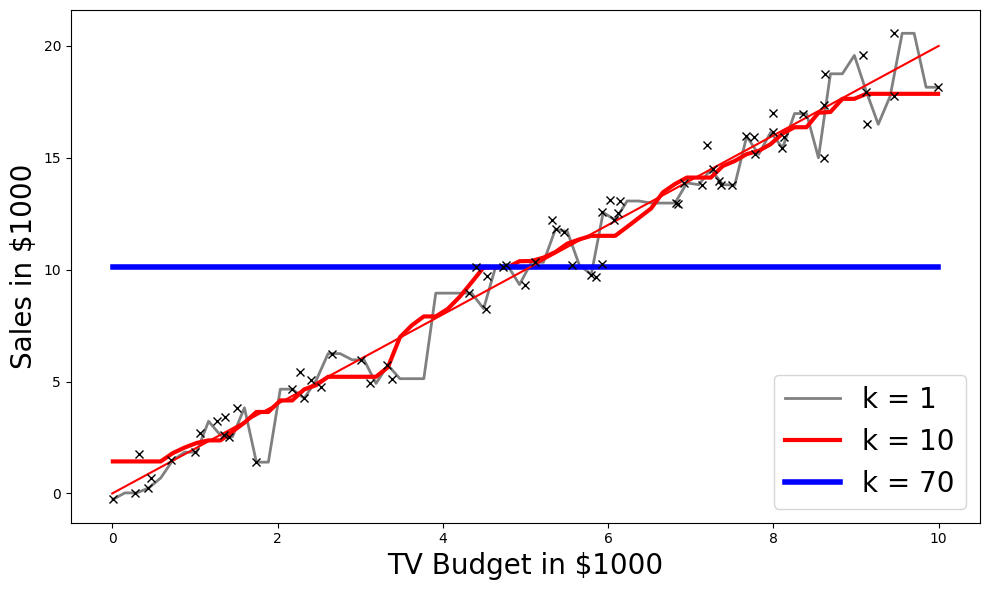

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsRegressor


x = np.random.rand(100, 1) * 10
y = 2  * x + np.random.randn(100, 1)
x_train, x_test, y_train, y_test = x[:70], x[70:], y[:70], y[:70]
k_list = [1, 10, 70]
x_true = np.linspace(0,10, 100).reshape(-1, 1)
y_true = 2 * x_true
fig, ax = plt.subplots(figsize=(10, 6))
j = 0
colors = ['grey','red', 'blue', 'green', 'orange', 'purple','brown']
for k_value in k_list:
    model = KNeighborsRegressor(n_neighbors=int(k_value))
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    if k_value in [1, 10, 70]:
        xvals = np.linspace(x.min(), x.max(), 70).reshape(-1, 1)
        ypreds = model.predict(xvals)
        ax.plot(xvals, ypreds, '-', label=f'k = {int(k_value)}',linewidth=j+2, color=colors[j])
        j += 1


ax.legend(loc='lower right', fontsize=20)
ax.plot(x_true, y_true, label='Exact', color='red')
ax.plot(x_train, y_train, 'x', label='train', color='k')
ax.set_xlabel('TV Budget in $1000', fontsize=20)
ax.set_ylabel('Sales in $1000', fontsize=20)
plt.tight_layout()
plt.show()
